In [653]:
import sys
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Get the data

In [654]:
from pathlib import Path
import pandas as pd

def load_housing_data():
    train = pd.read_csv('data/train.csv')
    return train

housing = load_housing_data()

## Quick Data Analysis

In [655]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [656]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [657]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [658]:
housing = housing.drop('Id', axis=1)
housing['MSSubClass'] = housing['MSSubClass'].astype('str')

In [659]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/2092703105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


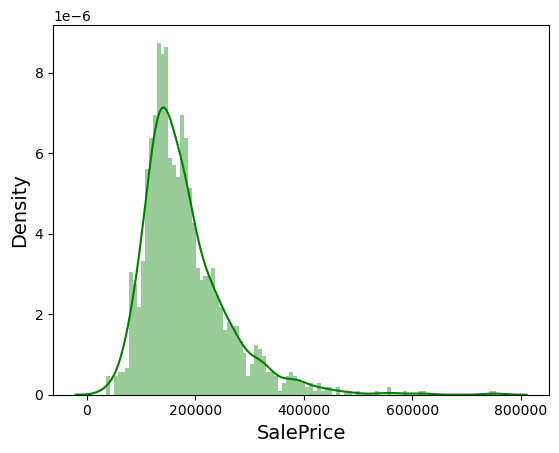

In [660]:
sns.distplot(housing['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

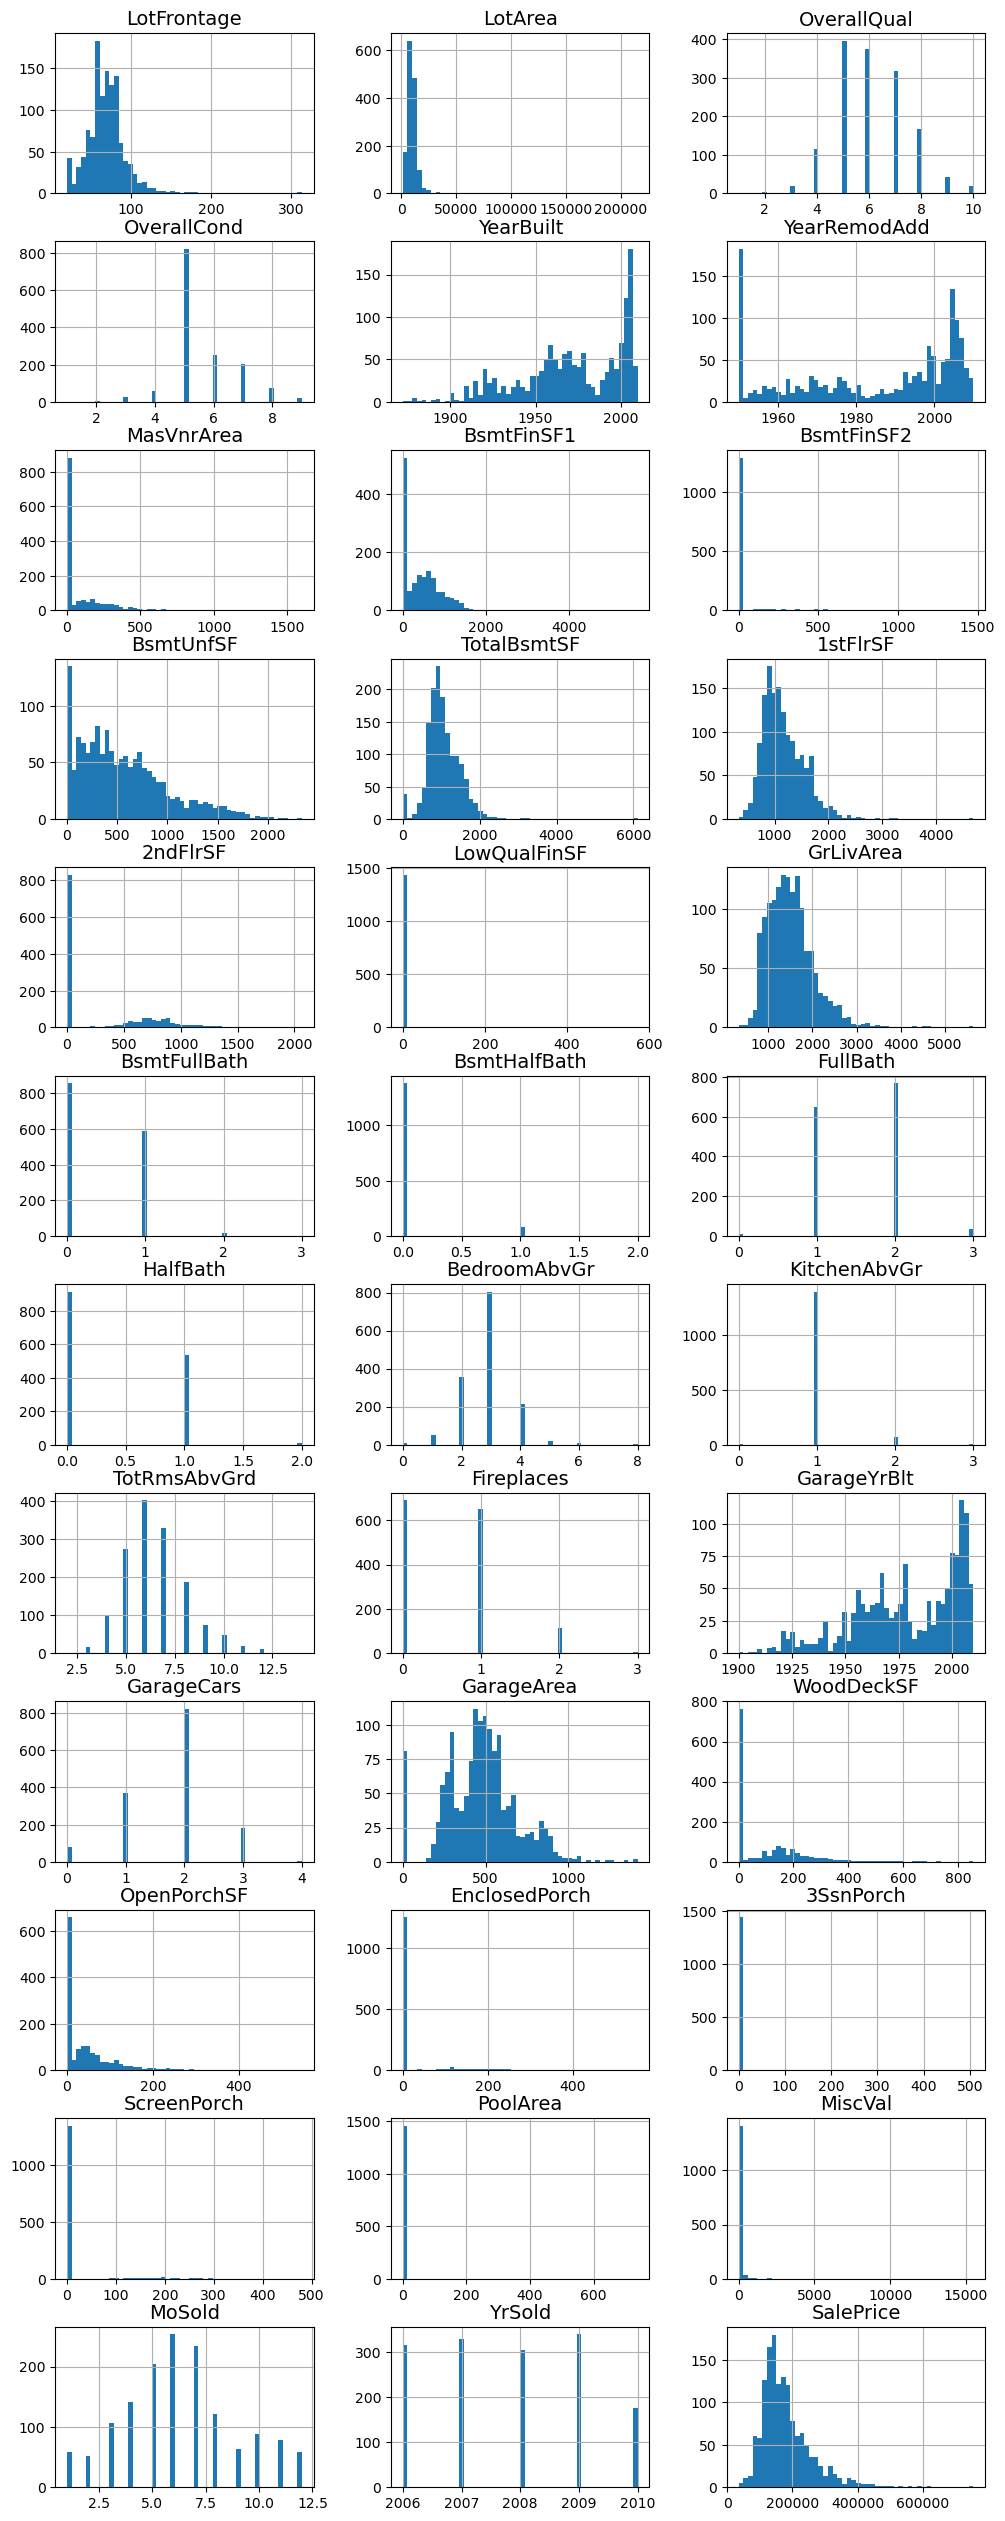

In [661]:
housing.hist(bins=50, figsize=(12, 40), layout=(15, 3))
plt.show()

## EDA

In [662]:
import numpy as np
df_num = housing.select_dtypes(include=[np.number])

In [663]:
df_num.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [664]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

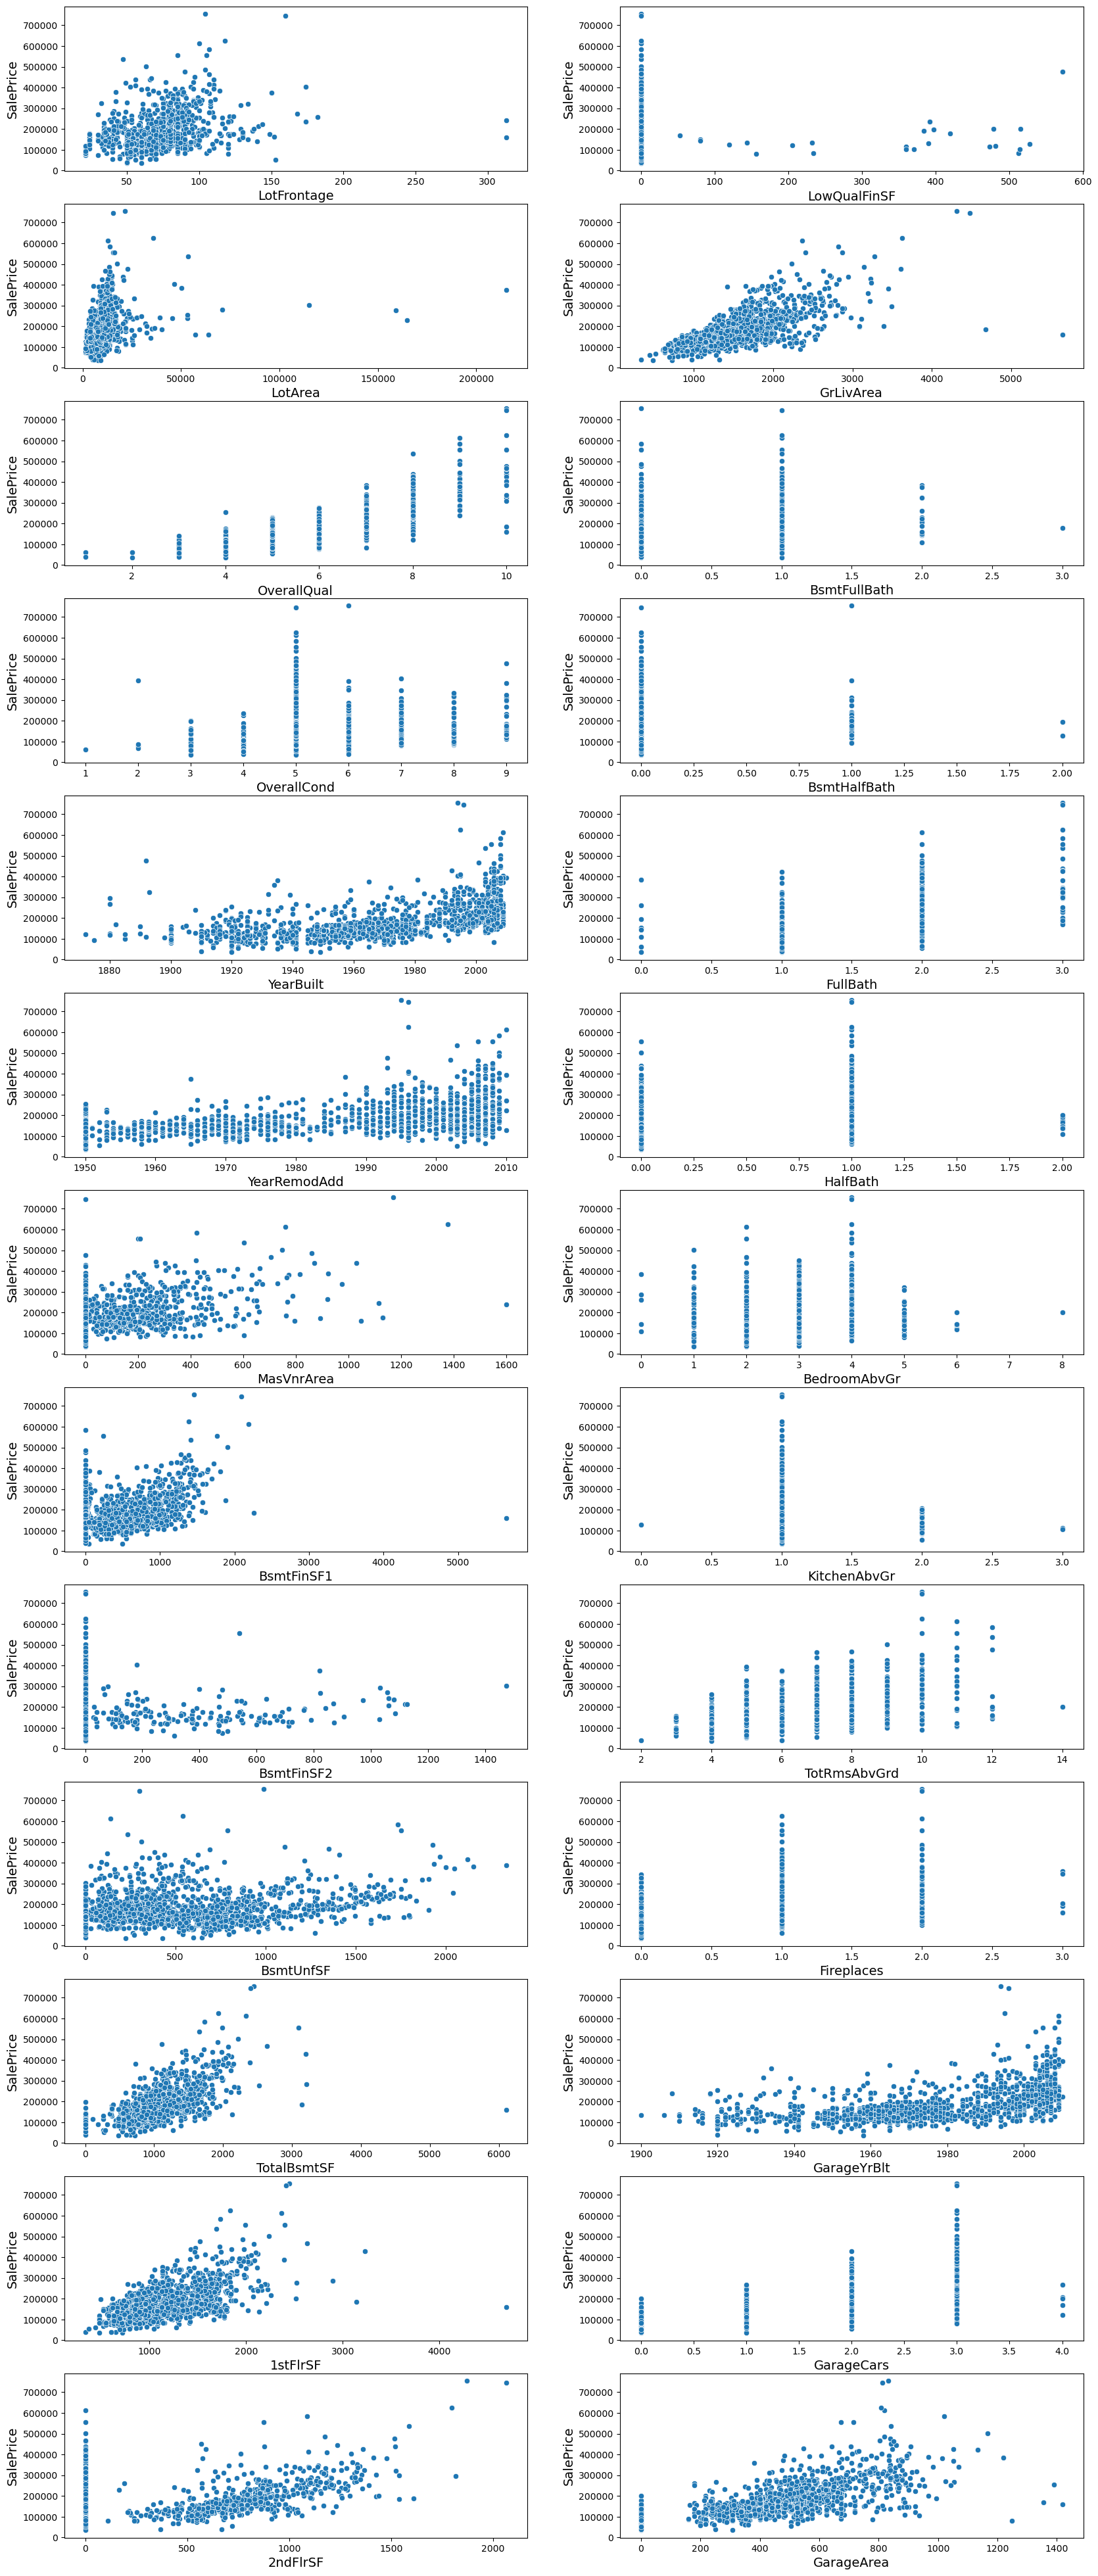

In [665]:
fig, axes = plt.subplots(13, 2, figsize=(20, 50))
cols = df_num.columns.tolist()
for i in range(13):
    for j in range(2):
        sns.scatterplot(data=df_num, x=cols[j* 13 + i], y='SalePrice', ax=axes[i, j])


<Axes: xlabel='1stFlrSF', ylabel='TotalBsmtSF'>

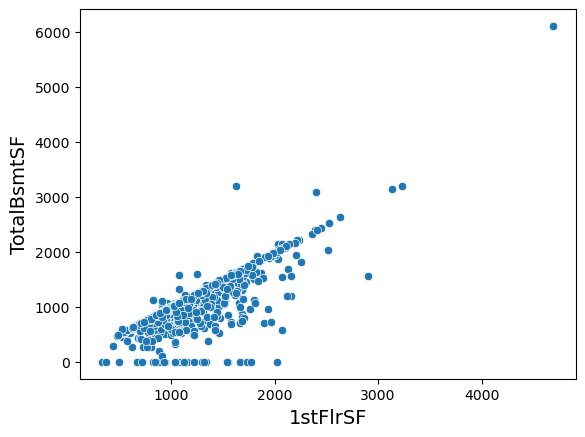

In [666]:
sns.scatterplot(data=df_num, x='1stFlrSF', y='TotalBsmtSF')

<Axes: xlabel='GrLivArea', ylabel='TotalBsmtSF'>

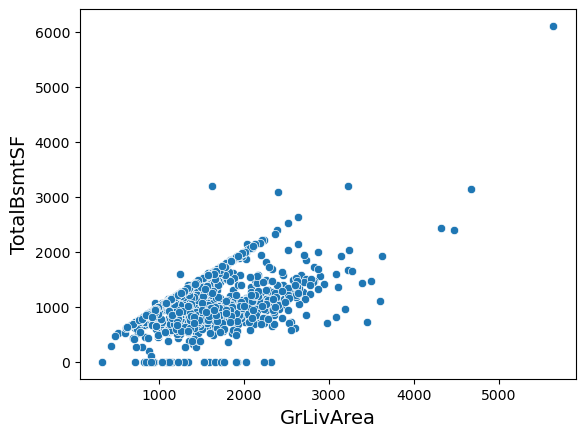

In [667]:
sns.scatterplot(data=df_num, x='GrLivArea', y='TotalBsmtSF')

### Explore categorical

In [668]:
df_cat = housing.select_dtypes(include=['object'])

In [669]:
housing.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [670]:
housing.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

### Num Feature scaling

<Axes: xlabel='LotArea', ylabel='Count'>

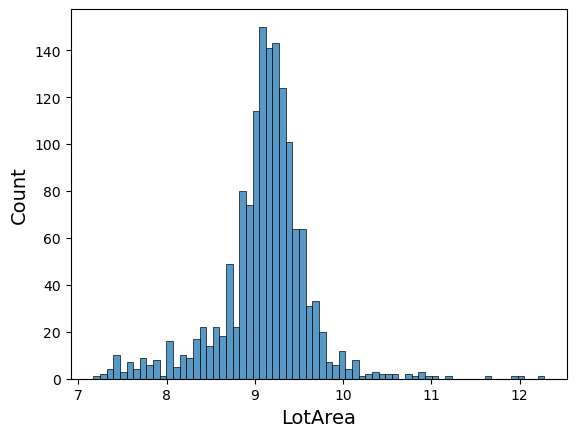

In [671]:
sns.histplot(data=np.log(df_num.LotArea))

<Axes: xlabel='LotArea', ylabel='Count'>

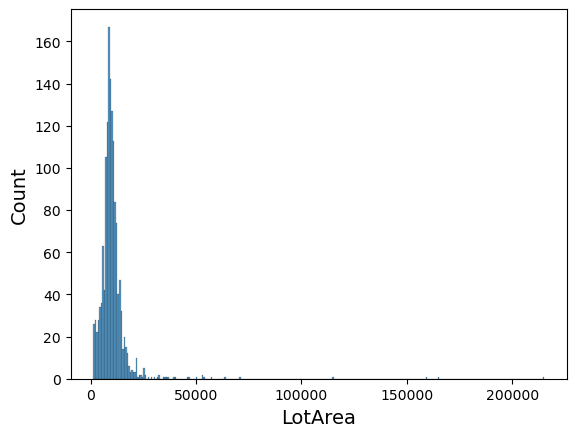

In [672]:
sns.histplot(data=df_num.LotArea)

## Linear regression

In [673]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_linear_model(train_set_X, train_set_y, test_set_X, test_set_y):
    linear_model = LinearRegression()
    linear_model.fit(train_set_X, train_set_y)
    predictions = linear_model.predict(test_set_X)
    rmse = mean_squared_error(predictions, test_set_y, squared=False)
    print(f"RMSE = {rmse}")
    return linear_model

## Pipelines

In [674]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
sklearn.set_config(display="diagram")

In [750]:
def safe_log(X):
    trX = np.log(X)
    trX[np.isneginf(trX) | np.isinf(trX)] = 0
    return trX


log_transformer = FunctionTransformer(safe_log, inverse_func=np.exp, feature_names_out="one-to-one")

log_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("log", log_transformer),
    ("standardize", StandardScaler())
])

default_num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("standardize", StandardScaler())
])

num_attributes_to_drop = ['YrSold', 'MoSold']

In [752]:
default_cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

cat_attributes = ["Neighborhood", "HouseStyle", "BldgType"]
attributes_to_drop = housing.select_dtypes(include='object').columns.tolist()
attributes_to_drop = [i for i in attributes_to_drop if i not in cat_attributes]

attributes_to_drop.extend(num_attributes_to_drop)
print(attributes_to_drop)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'YrSold', 'MoSold']


In [754]:
log_attributes = ["LotArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea"]
preprocessing = ColumnTransformer([   
    ("log", log_pipeline, log_attributes),
    ("cat", default_cat_pipeline, cat_attributes),
    ("drop", "drop", attributes_to_drop)
], remainder=default_num_pipeline)


housing_prepared = housing.drop(['SalePrice'], axis=1)
housing_X = housing.drop(['SalePrice'], axis=1)
housing_labels = np.log(housing.SalePrice)
housing_prepared = preprocessing.fit_transform(housing_prepared)
housing_prepared = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index = housing.index
)

/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/Users/ssaluja/anaconda3/envs/learnML/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


In [755]:
housing_prepared.columns

Index(['log__LotArea', 'log__BsmtFinSF1', 'log__BsmtFinSF2', 'log__BsmtUnfSF',
       'log__TotalBsmtSF', 'log__1stFlrSF', 'log__2ndFlrSF',
       'log__LowQualFinSF', 'log__GrLivArea', 'cat__Neighborhood_Blmngtn',
       'cat__Neighborhood_Blueste', 'cat__Neighborhood_BrDale',
       'cat__Neighborhood_BrkSide', 'cat__Neighborhood_ClearCr',
       'cat__Neighborhood_CollgCr', 'cat__Neighborhood_Crawfor',
       'cat__Neighborhood_Edwards', 'cat__Neighborhood_Gilbert',
       'cat__Neighborhood_IDOTRR', 'cat__Neighborhood_MeadowV',
       'cat__Neighborhood_Mitchel', 'cat__Neighborhood_NAmes',
       'cat__Neighborhood_NPkVill', 'cat__Neighborhood_NWAmes',
       'cat__Neighborhood_NoRidge', 'cat__Neighborhood_NridgHt',
       'cat__Neighborhood_OldTown', 'cat__Neighborhood_SWISU',
       'cat__Neighborhood_Sawyer', 'cat__Neighborhood_SawyerW',
       'cat__Neighborhood_Somerst', 'cat__Neighborhood_StoneBr',
       'cat__Neighborhood_Timber', 'cat__Neighborhood_Veenker',
       'cat__H

In [756]:
housing_labels.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [757]:
from sklearn.model_selection import train_test_split 


X = housing_prepared
y = housing_labels
train_set_X, test_set_X, train_set_y, test_set_y = train_test_split(X, y, test_size=0.2)

In [758]:
linear_model = train_linear_model(train_set_X, train_set_y, test_set_X, test_set_y)

RMSE = 0.17116018341440808


In [759]:
test = pd.read_csv('data/test.csv', index_col='Id')
test_prepared = preprocessing.transform(test)
test_prepared = pd.DataFrame(test_prepared, columns=preprocessing.get_feature_names_out())
predictions = linear_model.predict(test_prepared)
df_predictions = pd.DataFrame(np.exp(predictions), index=test.index, columns=['SalePrice'])

/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)


In [760]:
df_predictions.head()

,SalePrice
Id,
1461,119520.840509
1462,157529.666713
1463,182005.742556
1464,202398.679050
1465,210966.117675


In [761]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
df_predictions.to_csv(f"output/linear-model-output-{timestr}.csv")

In [762]:
from sklearn.model_selection import cross_val_score

linear_reg = make_pipeline(preprocessing,
                          LinearRegression())
linear_reg_rmses = -cross_val_score(linear_reg, 
                                housing_X, 
                                housing_labels,
                                scoring="neg_root_mean_squared_error", 
                                cv=10)
pd.Series(linear_reg_rmses).describe()

/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/Users/ssaluja/anaconda3/envs/learnML/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/Users/ssaluja/anaconda3/envs/learnML/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=F

count    10.000000
mean      0.129964
std       0.019141
min       0.109961
25%       0.115103
50%       0.124051
75%       0.145145
max       0.162265
dtype: float64

## Random Forest

In [763]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, 
                                housing_X, 
                                housing_labels,
                                scoring="neg_root_mean_squared_error", 
                                cv=10)
pd.Series(forest_rmses).describe()

/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/Users/ssaluja/anaconda3/envs/learnML/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/Users/ssaluja/anaconda3/envs/learnML/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=F

count    10.000000
mean      0.141294
std       0.019143
min       0.118086
25%       0.127157
50%       0.138324
75%       0.151629
max       0.175944
dtype: float64

In [764]:
import time
rf_regressor = RandomForestRegressor()
forest_reg.fit(housing_X, housing_labels)

predictions = np.exp(forest_reg.predict(test))
df_predictions = pd.DataFrame(predictions, index=test.index, columns=['SalePrice'])

/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/Users/ssaluja/anaconda3/envs/learnML/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)


In [765]:
print(df_predictions.head())
timestr = time.strftime("%Y%m%d-%H%M%S")
df_predictions.to_csv(f"output/rf-model-output-{timestr}.csv")

          SalePrice
Id                 
1461  125594.683513
1462  153686.344018
1463  178009.535876
1464  182144.432602
1465  197050.486755


## Grid Search for Hyper parameter tuning

In [766]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
  {'random_forest__max_features': [4, 6, 8]}
]

grid_search = GridSearchCV(full_pipeline, 
                           param_grid, 
                           cv=3,
                           scoring='neg_root_mean_squared_error',
                           refit=True)
grid_search.fit(housing_X, housing_labels)

/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/Users/ssaluja/anaconda3/envs/learnML/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
/Users/ssaluja/anaconda3/envs/learnML/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=F

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardize',
                                                                                     StandardScaler())]),
                                                          transformers=[('log',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function safe_log at 0x1...
                                                                          'MasVnrType',
                                                                          'ExterQual',
                                                                          'ExterCond',
                                                                          'Foundation',
                                                                          'BsmtQual',
                                                                          'BsmtCond',
                                                                          'BsmtExposure',
                                                                          'BsmtFinType1',
                                                                          'BsmtFinType2',
                                                                          'Heating',
                                                                          'HeatingQC',
                                                                          'CentralAir',
                                                                          'Electrical',
                                                                          'KitchenQual',
                                                                          'Functional', ...])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8]}],
             scoring='neg_root_mean_squared_error')

In [767]:
grid_search.best_params_

{'random_forest__max_features': 8}

In [768]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,0.282655,0.005846,0.019882,0.000291,8,{'random_forest__max_features': 8},-0.138541,-0.156689,-0.137681,-0.144304,0.008765,1
1,0.241272,0.017604,0.019289,0.002216,6,{'random_forest__max_features': 6},-0.139894,-0.158994,-0.137778,-0.145555,0.009542,2
0,0.238144,0.014441,0.022966,0.002577,4,{'random_forest__max_features': 4},-0.145104,-0.160261,-0.140167,-0.148510,0.008550,3


In [769]:
predictions = np.exp(grid_search.predict(test))
df_predictions = pd.DataFrame(predictions, index=test_prepared.index, columns=['SalePrice'])

timestr = time.strftime("%Y%m%d-%H%M%S")
file_name = "output/grid-search-output-{timestr}.csv"
df_predictions.to_csv(file_name)

/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)


In [770]:
final_model = grid_search.best_estimator_
sorted(
  zip(
    final_model['random_forest'].feature_importances_, 
    final_model['preprocessing'].get_feature_names_out()), 
  reverse=True)

[(0.11367133633844312, 'remainder__OverallQual'),
 (0.1127161556584563, 'log__GrLivArea'),
 (0.06952735396881736, 'remainder__YearBuilt'),
 (0.06641171034974393, 'remainder__GarageCars'),
 (0.06139672861121696, 'remainder__GarageArea'),
 (0.05595066473841763, 'remainder__YearRemodAdd'),
 (0.05562641625172632, 'log__TotalBsmtSF'),
 (0.05313549471751002, 'log__1stFlrSF'),
 (0.04867575166472798, 'remainder__GarageYrBlt'),
 (0.03635994292690085, 'remainder__FullBath'),
 (0.03467001793301555, 'log__BsmtFinSF1'),
 (0.03220819246874357, 'remainder__Fireplaces'),
 (0.030019841607989307, 'log__LotArea'),
 (0.02535253937131135, 'log__2ndFlrSF'),
 (0.022802679401727394, 'remainder__TotRmsAbvGrd'),
 (0.022137538907157094, 'remainder__MasVnrArea'),
 (0.021114450197407895, 'remainder__LotFrontage'),
 (0.02006366247883193, 'remainder__OpenPorchSF'),
 (0.013450604126160679, 'remainder__WoodDeckSF'),
 (0.012981967368569882, 'remainder__OverallCond'),
 (0.011705264495272488, 'log__BsmtUnfSF'),
 (0.00783

In [771]:
predictions = np.exp(final_model.predict(test))
df_predictions = pd.DataFrame(predictions, index=test.index, columns=['SalePrice'])
print(df_predictions.head())
timestr = time.strftime("%Y%m%d-%H%M%S")
df_predictions.to_csv(f"output/grid-search-output-{timestr}.csv")

          SalePrice
Id                 
1461  126828.180241
1462  149413.050018
1463  184866.573716
1464  185825.138880
1465  190947.454213


/var/folders/k0/sx20f6ns74q5g9gp7dgdvvw00000gp/T/ipykernel_26618/3244056860.py:2: RuntimeWarning: divide by zero encountered in log
  trX = np.log(X)
